In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
#import seaborn as sns
import pickle


In [2]:
df = pd.read_csv('datasets/winequality_red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
set(df.quality)

{3, 4, 5, 6, 7, 8}

In [3]:
pf = ProfileReport(df)
pf.to_widgets()

In [5]:
pf.to_file('winequality_red.html')

In [6]:
# We remove duplicate row as they are not any way helping extra in learning of model but incresing computation time

df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
x = df.drop(columns='quality')
y = df['quality']

In [5]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [7]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [6]:
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size = .20 , random_state = 500)

In [4]:
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline

In [12]:
sklearn.__version__ #should be >23

'0.23.2'

In [8]:
dt_model  = DecisionTreeClassifier()

In [9]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(596.1681158133646, 1066.2923076923078, 'X[10] <= 10.55\ngini = 0.64\nsamples = 1279\nvalue = [10, 38, 542, 519, 155, 15]'),
 Text(398.9437662117095, 1024.4769230769232, 'X[6] <= 95.5\ngini = 0.546\nsamples = 795\nvalue = [7, 23, 458, 275, 30, 2]'),
 Text(197.98239408349804, 982.6615384615385, 'X[9] <= 0.525\ngini = 0.57\nsamples = 698\nvalue = [7, 22, 369, 268, 30, 2]'),
 Text(21.393675889328062, 940.8461538461539, 'X[7] <= 0.994\ngini = 0.419\nsamples = 128\nvalue = [2, 11, 95, 19, 1, 0]'),
 Text(17.864822134387353, 899.0307692307692, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(24.922529644268774, 899.0307692307692, 'X[10] <= 9.15\ngini = 0.395\nsamples = 125\nvalue = [2, 8, 95, 19, 1, 0]'),
 Text(7.057707509881423, 857.2153846153847, 'X[2] <= 0.245\ngini = 0.611\nsamples = 6\nvalue = [0, 3, 1, 2, 0, 0]'),
 Text(3.5288537549407115, 815.4000000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0, 0, 0, 0]'),
 Text(10.586561264822134, 815.4000000000001, 'X[7] <= 0.

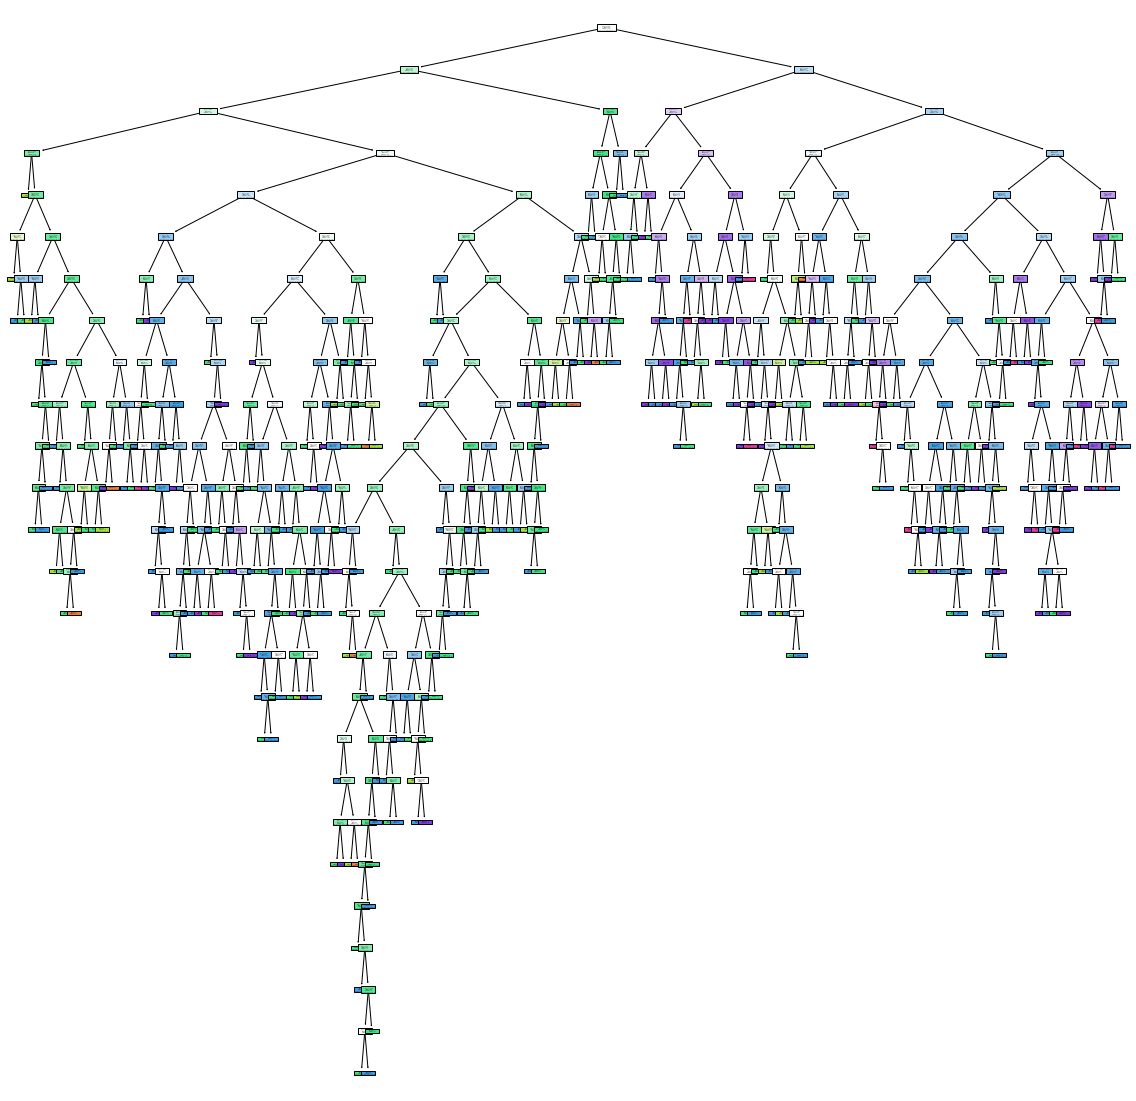

In [21]:
#to visualize decision tree
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model,filled=True)

[Text(418.5, 996.6, 'X[1] <= 0.355\ngini = 0.471\nsamples = 30\nvalue = [1, 21, 5, 3]\nclass = 5'),
 Text(186.0, 815.4000000000001, 'X[6] <= 81.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 3, 1]\nclass = 6'),
 Text(93.0, 634.2, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]\nclass = 6'),
 Text(279.0, 634.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]\nclass = 7'),
 Text(651.0, 815.4000000000001, 'X[6] <= 22.0\ngini = 0.334\nsamples = 26\nvalue = [1, 21, 2, 2]\nclass = 5'),
 Text(465.0, 634.2, 'X[6] <= 17.0\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2]\nclass = 7'),
 Text(372.0, 453.0, 'X[4] <= 0.081\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0]\nclass = 5'),
 Text(279.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]\nclass = 5'),
 Text(465.0, 271.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = 6'),
 Text(558.0, 453.0, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]\nclass = 7'),
 Text(837.0, 634.2, 'X[10] <= 9.05\ngini = 0.169\nsamples

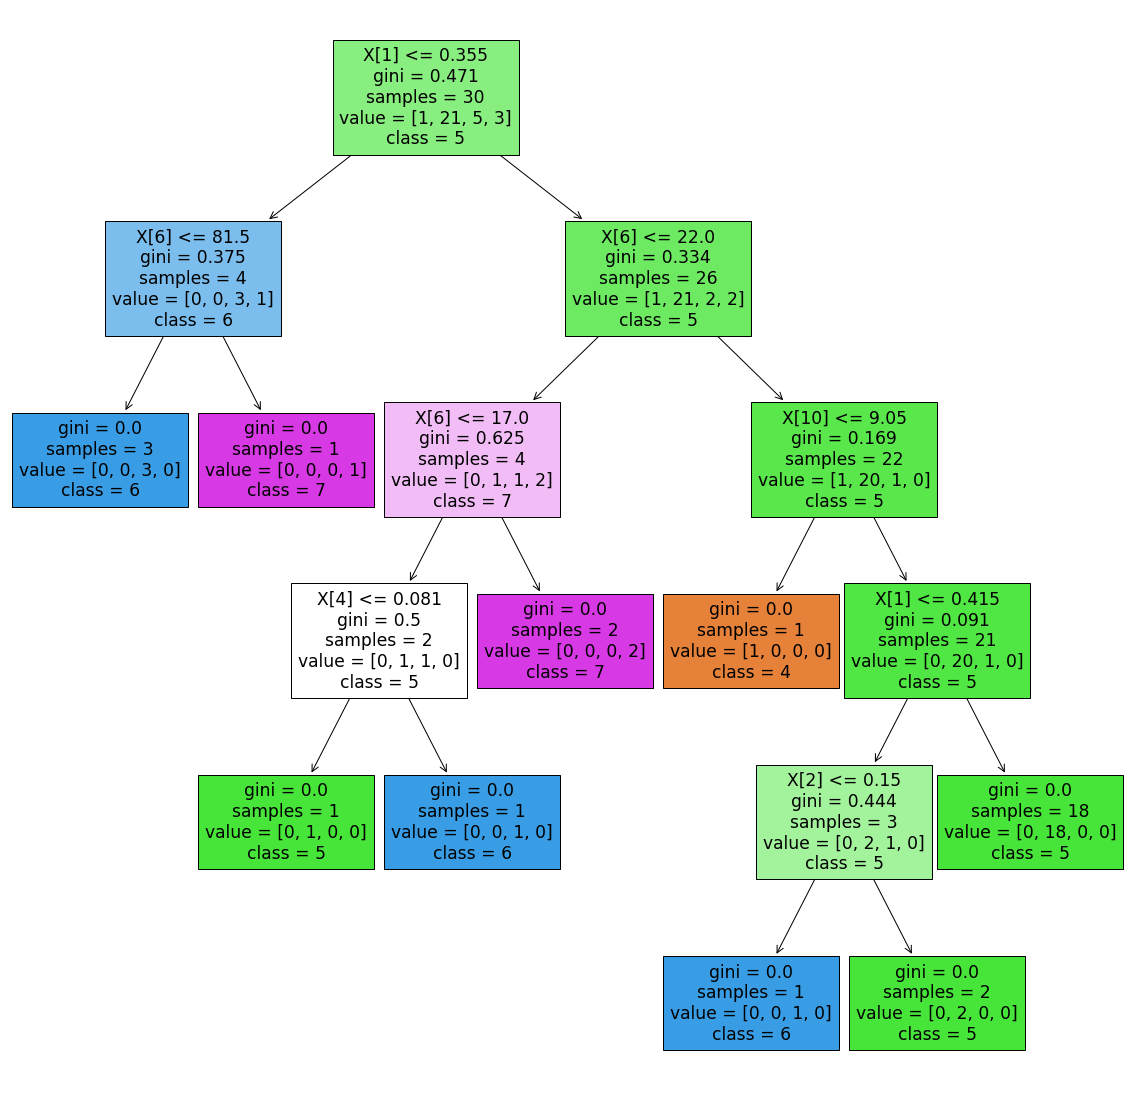

In [11]:
# now using smaller data set to visualize decision tree in understanble way 
df1 = df.head(30)
x1 = df1.drop(columns='quality')
y1 = df1['quality']

dt_model1  = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True,class_names=[str(i) for i in set(y1)]) 
#filled=True for color box
#class_names = list of string of unique class/label
#feature_names = list of feature columns

In [12]:
#x[0] means 1st column i.e 'fixed acidity'
#x[1] means 2nd column i.e 'volatile acidity'
# so on..
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [13]:
df1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


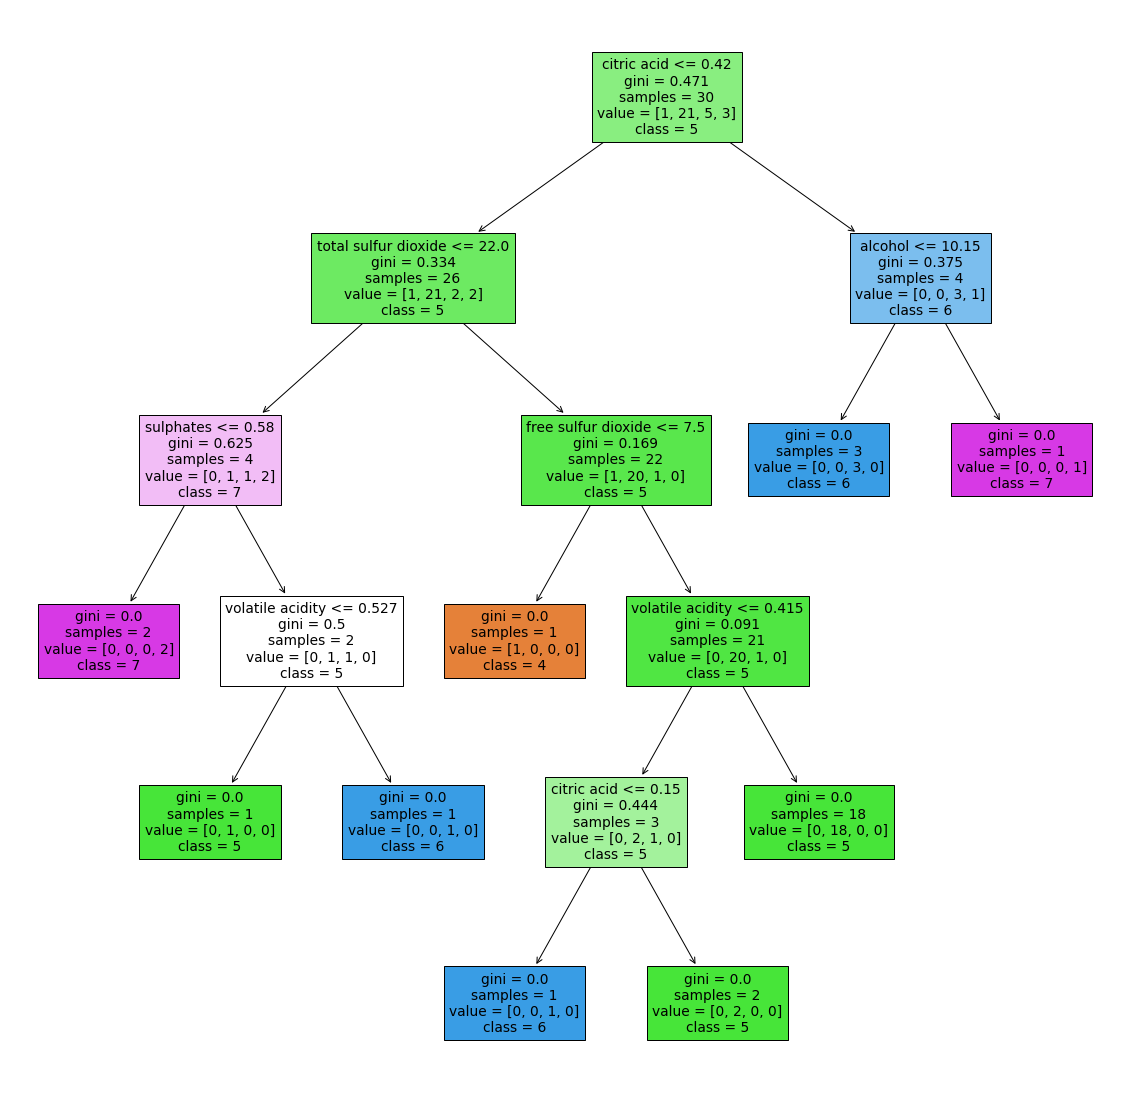

In [31]:
# showing columns and saving image
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1,filled=True,feature_names=x1.columns,class_names=[str(i) for i in set(y1)]) 
plt.savefig('small_decision_tree')

In [ ]:
# we can prune branch below node volatile acidity <= 0.415 as it has majority data of class 5 i.e 20,
# only one data of class 6 and no data of other classes

In [32]:
dt_model1.score(x1, y1) 

1.0

In [33]:
dt_model1.score(x_test, y_test) #  overfitted model as performing bad on new data

0.38125

In [39]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)
path

{'ccp_alphas': array([0.        , 0.03174603, 0.03333333, 0.05      , 0.05      ,
        0.06075036, 0.08216783, 0.13136752]),
 'impurities': array([0.        , 0.06349206, 0.0968254 , 0.1468254 , 0.1968254 ,
        0.25757576, 0.33974359, 0.47111111])}

In [40]:
ccp_alpha = path['ccp_alphas'] # csot complexity of each branch created 
ccp_alpha # threshold value if cost complexity value is > this then don't allow new branch 

array([0.        , 0.03174603, 0.03333333, 0.05      , 0.05      ,
       0.06075036, 0.08216783, 0.13136752])

In [43]:
#building different decision tree models with different values of ccp_alpha 
dt_models = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_models.append(dt_m)

In [46]:
dt_models

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.03174603174603176),
 DecisionTreeClassifier(ccp_alpha=0.03333333333333333),
 DecisionTreeClassifier(ccp_alpha=0.049999999999999996),
 DecisionTreeClassifier(ccp_alpha=0.05),
 DecisionTreeClassifier(ccp_alpha=0.06075036075036072),
 DecisionTreeClassifier(ccp_alpha=0.08216783216783222),
 DecisionTreeClassifier(ccp_alpha=0.1313675213675214)]

In [47]:
train_scores = [i.score(x1,y1) for i in dt_models]
train_scores

[1.0,
 0.9666666666666667,
 0.9333333333333333,
 0.9,
 0.8666666666666667,
 0.8333333333333334,
 0.8,
 0.7]

In [48]:
test_scores = [i.score(x_test,y_test) for i in dt_models]
test_scores

[0.44375, 0.45, 0.453125, 0.403125, 0.403125, 0.421875, 0.465625, 0.434375]

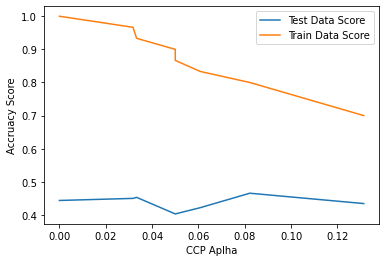

In [54]:
# we should select ccp value where accruaccy with train and test data is same or close to each other to avoid over fitted model
plt.plot(ccp_alpha,test_scores,label="Test Data Score")
plt.plot(ccp_alpha,train_scores,label="Train Data Score")
plt.xlabel("CCP Aplha")
plt.ylabel("Accruacy Score")
plt.legend()
#since we have small data in train data set we have huge gap in train and test accuracy 

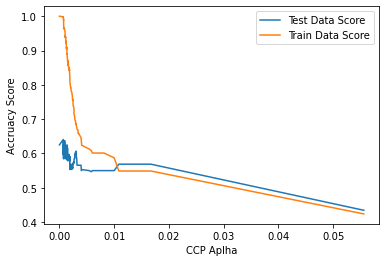

In [55]:
#now doing same on originally splitted data set to have significant number of data in train data set

path = dt_model.cost_complexity_pruning_path(x_train,y_train)

ccp_alpha = path['ccp_alphas']

dt_models = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x_train,y_train)
    dt_models.append(dt_m)

train_scores = [i.score(x_train,y_train) for i in dt_models]

test_scores = [i.score(x_test,y_test) for i in dt_models]

plt.plot(ccp_alpha,test_scores,label="Test Data Score")
plt.plot(ccp_alpha,train_scores,label="Train Data Score")
plt.xlabel("CCP Aplha")
plt.ylabel("Accruacy Score")
plt.legend()

In [63]:
#we can use approx 0.011 CCP value as a hyper paramter to avoid overfitted model 
dt_model_ccp = DecisionTreeClassifier(ccp_alpha=0.011)
dt_model_ccp.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.011)

In [64]:
dt_model_ccp.predict(x_test) 

array([6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6,
       5, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5,
       5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 5,
       5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5,
       6, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5,

In [65]:
# trainig accruacy 
dt_model_ccp.score(x_train, y_train)

0.5488663017982799

In [66]:
# testing accruacy 
dt_model_ccp.score(x_test, y_test)
# score differece between train and test is less now so our model is not overfitted 

0.56875

[Text(744.0, 951.3000000000001, 'alcohol <= 10.55\ngini = 0.64\nsamples = 1279\nvalue = [10, 38, 542, 519, 155, 15]\nclass = 5'),
 Text(558.0, 679.5, 'total sulfur dioxide <= 95.5\ngini = 0.546\nsamples = 795\nvalue = [7, 23, 458, 275, 30, 2]\nclass = 5'),
 Text(372.0, 407.70000000000005, 'sulphates <= 0.525\ngini = 0.57\nsamples = 698\nvalue = [7, 22, 369, 268, 30, 2]\nclass = 5'),
 Text(186.0, 135.89999999999998, 'gini = 0.419\nsamples = 128\nvalue = [2, 11, 95, 19, 1, 0]\nclass = 5'),
 Text(558.0, 135.89999999999998, 'gini = 0.575\nsamples = 570\nvalue = [5, 11, 274, 249, 29, 2]\nclass = 5'),
 Text(744.0, 407.70000000000005, 'gini = 0.153\nsamples = 97\nvalue = [0, 1, 89, 7, 0, 0]\nclass = 5'),
 Text(930.0, 679.5, 'gini = 0.647\nsamples = 484\nvalue = [3, 15, 84, 244, 125, 13]\nclass = 6')]

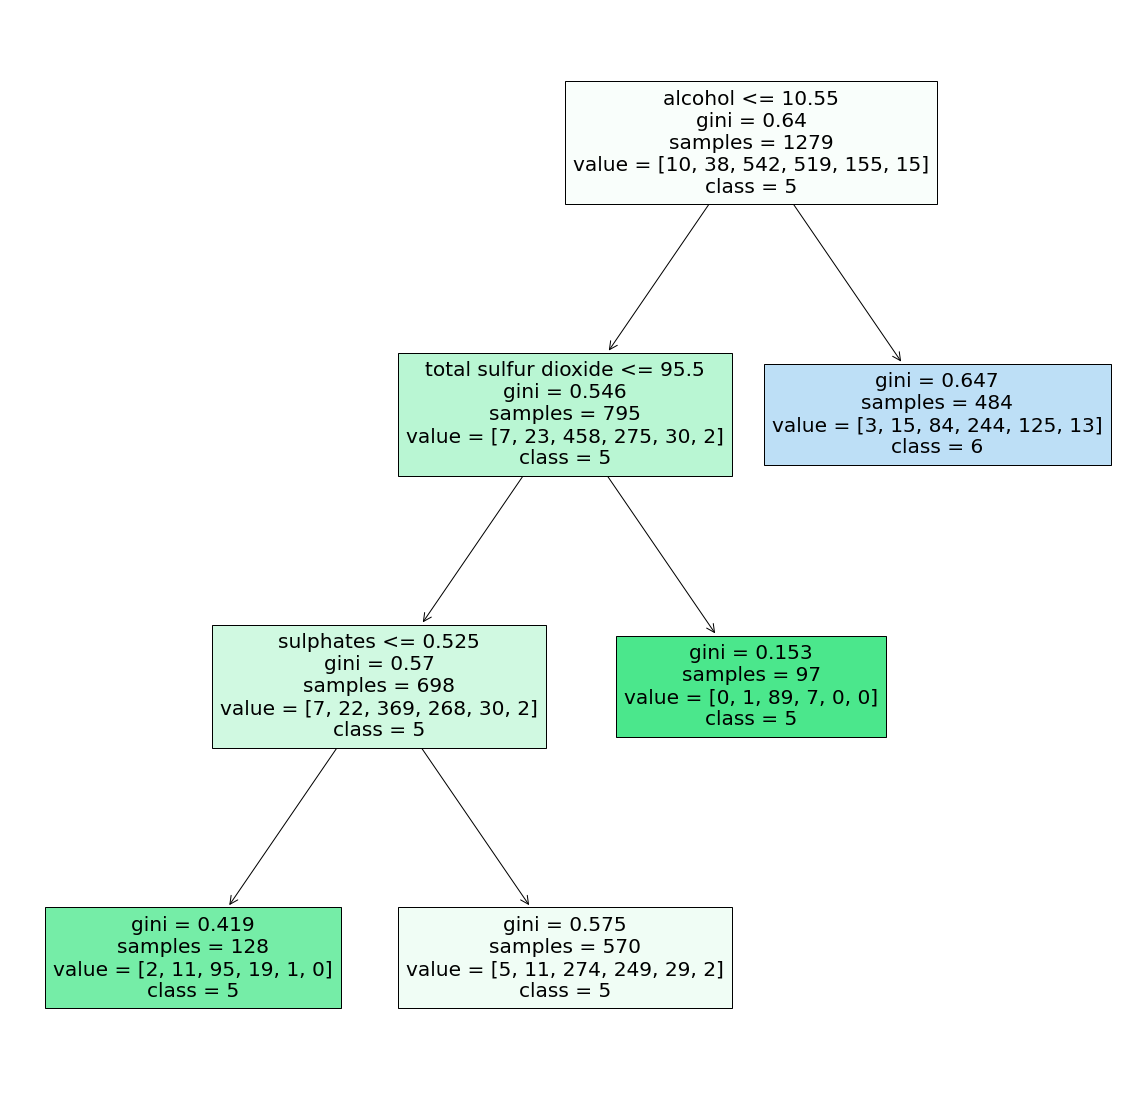

In [67]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True,feature_names=x_train.columns,class_names=[str(i) for i in set(y_train)])
# will notice for same data x_train, y_train now less complex decision tree is build

In [22]:
dt_en = DecisionTreeClassifier(criterion="entropy")
dt_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [23]:
dt_en.score(x_test, y_test)

0.65625

In [68]:
#hyper parameter tunning usring grid serach cv
grid_param = { 'criterion' : ['gini','entropy'],
               'splitter' : ['best','random'],
               'max_depth' : range(2,40,1),
               'min_samples_split' : range(2,10,1),
               'min_samples_leaf' : range(1,10,1)
             }

In [72]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_param,cv=5,n_jobs=-1)
#n_jobs=-1 means occupy all avaibale processors 
# cv =5 means data will be divided in 5 subsets to derive best hyper parameters 

In [73]:
grid_ccp.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(ccp_alpha=0.011), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [74]:
grid_ccp.best_params_

{'criterion': 'entropy',
 'max_depth': 23,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'splitter': 'random'}

In [75]:
dt_ccp_gridparam = DecisionTreeClassifier(criterion='entropy',max_depth=23,min_samples_leaf=3,min_samples_split=4,
                                             splitter='random',ccp_alpha=0.011)

In [76]:
dt_ccp_gridparam.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.011, criterion='entropy', max_depth=23,
                       min_samples_leaf=3, min_samples_split=4,
                       splitter='random')

In [77]:
dt_ccp_gridparam.score(x_train,y_train)

0.5840500390930414

In [78]:
dt_ccp_gridparam.score(x_test,y_test)

0.59375

In [79]:
# confusion matrix for multiple classes

pred = dt_ccp_gridparam.predict(x_train)
confusion_matrix(y_train,pred)

# values with 0 means class may not be available in prediction and actual data set 
# columns => predicted values
# rows => actual values 
# diagonal values of each columns showing True positive values of corresponding class
# sum of elements row belongs to particular class will give False Negative value  
# sum of elements column belongs to particular class will give False Positive value 
# sum of rest of the elements not in row or column belonging to a class is True Negative

array([[  0,   0,  10,   0,   0,   0],
       [  0,   0,  26,  12,   0,   0],
       [  0,   0, 426, 116,   0,   0],
       [  0,   0, 216, 293,  10,   0],
       [  0,   0,  17, 110,  28,   0],
       [  0,   0,   0,  14,   1,   0]], dtype=int64)

In [111]:
tp=0
fn=0
fp=0
tn=0
data =6
total = len(list(y_train))
for i in range(total):
    
    if (list(y_train)[i] == data):
        if( list(y_train)[i] == list(pred)[i]):
            tp+=1        
        else:
            fn+=1
    elif(list(pred)[i] == data):
        fp +=1
    else:
        tn+=1
            
print('True Postive',tp)
print('False Negative',fn)
print('False Positive',fp)
print('True Negative',tn)

True Postive 293
False Negative 226
False Positive 252
True Negative 508


In [97]:
set(y_train)

{3, 4, 5, 6, 7, 8}

In [24]:
outfile = open('dt_en_meta.dot','w')
tree.export_graphviz(dt_en,out_file=outfile , feature_names=x.columns)

In [25]:
dir()

['DecisionTreeClassifier',
 'GridSearchCV',
 'In',
 'Out',
 'ProfileReport',
 '_',
 '_12',
 '_13',
 '_14',
 '_15',
 '_16',
 '_19',
 '_20',
 '_21',
 '_22',
 '_23',
 '_3',
 '_6',
 '_8',
 '_9',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i10',
 '_i11',
 '_i12',
 '_i13',
 '_i14',
 '_i15',
 '_i16',
 '_i17',
 '_i18',
 '_i19',
 '_i2',
 '_i20',
 '_i21',
 '_i22',
 '_i23',
 '_i24',
 '_i25',
 '_i3',
 '_i4',
 '_i5',
 '_i6',
 '_i7',
 '_i8',
 '_i9',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'accuracy_score',
 'confusion_matrix',
 'df',
 'dt_en',
 'dt_model',
 'exit',
 'get_ipython',
 'np',
 'outfile',
 'pd',
 'pf',
 'pickle',
 'plt',
 'quit',
 'roc_auc_score',
 'roc_curve',
 'sns',
 'train_test_split',
 'tree',
 'x',
 'x_test',
 'x_train',
 'y',
 'y_test',
 'y_train']

In [28]:
!pip install graphviz

In [30]:
from graphviz import Source
from IPython.display import SVG

In [31]:
graph = Source( tree.export_graphviz(dt_en, out_file=None, feature_names=x.columns))
SVG(graph.pipe(format='svg'))

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

# Bagging

In [14]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [34]:
x = df.drop(columns=['quality'])
y = df['quality'] 

In [5]:
from sklearn.ensemble import BaggingClassifier

In [36]:
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=0) #by default test size=0.25 

In [37]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)
#n_estimators no of trees

In [38]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [39]:
bag_dt.predict(x_test)

array([5, 5, 7, 5, 4, 5, 5, 6, 5, 5, 5, 5, 6, 4, 5, 7, 7, 5, 6, 6, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 6, 6, 7,
       6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 6, 5, 6, 6, 5, 6,
       5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 7, 6, 5, 6, 5,
       6, 5, 5, 5, 6, 5, 7, 6, 7, 5, 5, 6, 7, 6, 6, 7, 5, 5, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 6, 7, 6, 6, 5, 5, 5, 5, 6, 7, 5, 5, 6, 6, 6, 5,
       6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 7, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 6, 6, 6, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 7, 4, 7,
       7, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 6, 7, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6, 6, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 6, 7, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6,

In [40]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [41]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [42]:
bag_dt.estimator_params

()

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [45]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [46]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 7, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 6, 5,
       6, 7, 7, 7, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 7, 5, 7, 7, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 6,
       5, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 5, 7, 7, 6,
       7, 7, 6, 5, 5, 6, 6, 5, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 7, 6, 7, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 7, 6, 7, 5, 6, 6, 6, 6, 5, 5, 5, 5,
       6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5,

In [47]:
bag_knn.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

# random forest

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [63]:
rf.score(x_test,y_test)

0.6675

In [64]:
bag_dt.score(x_test,y_test)

0.64

In [65]:
bag_knn.score(x_test,y_test)

0.4675

In [66]:
rf.estimators_ # total 10 tress are created 

[DecisionTreeClassifier(max_features='auto', random_state=1590324712),
 DecisionTreeClassifier(max_features='auto', random_state=120267014),
 DecisionTreeClassifier(max_features='auto', random_state=1427630046),
 DecisionTreeClassifier(max_features='auto', random_state=1607083952),
 DecisionTreeClassifier(max_features='auto', random_state=105452866),
 DecisionTreeClassifier(max_features='auto', random_state=219862149),
 DecisionTreeClassifier(max_features='auto', random_state=57879726),
 DecisionTreeClassifier(max_features='auto', random_state=826359640),
 DecisionTreeClassifier(max_features='auto', random_state=1238366421),
 DecisionTreeClassifier(max_features='auto', random_state=1783273222)]

In [67]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=1590324712)

[Text(629.5191092451523, 1065.4560000000001, 'X[10] <= 10.525\ngini = 0.653\nsamples = 761\nvalue = [6, 49, 515, 451, 168, 10]'),
 Text(369.91088123268696, 1021.9680000000001, 'X[6] <= 98.5\ngini = 0.556\nsamples = 478\nvalue = [5, 33, 444, 238, 40, 0]'),
 Text(177.18464335180053, 978.48, 'X[0] <= 6.85\ngini = 0.58\nsamples = 417\nvalue = [5, 31, 364, 229, 39, 0]'),
 Text(35.55124653739612, 934.9920000000001, 'X[0] <= 5.75\ngini = 0.39\nsamples = 47\nvalue = [1, 5, 57, 7, 4, 0]'),
 Text(31.429362880886423, 891.504, 'gini = 0.0\nsamples = 3\nvalue = [0, 4, 0, 0, 0, 0]'),
 Text(39.67313019390581, 891.504, 'X[3] <= 1.45\ngini = 0.323\nsamples = 44\nvalue = [1, 1, 57, 7, 4, 0]'),
 Text(22.670360110803323, 848.0160000000001, 'X[10] <= 9.65\ngini = 0.612\nsamples = 4\nvalue = [1, 0, 3, 0, 3, 0]'),
 Text(18.548476454293628, 804.528, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(26.792243767313018, 804.528, 'X[7] <= 0.995\ngini = 0.375\nsamples = 2\nvalue = [1, 0, 0, 0, 3, 0]')

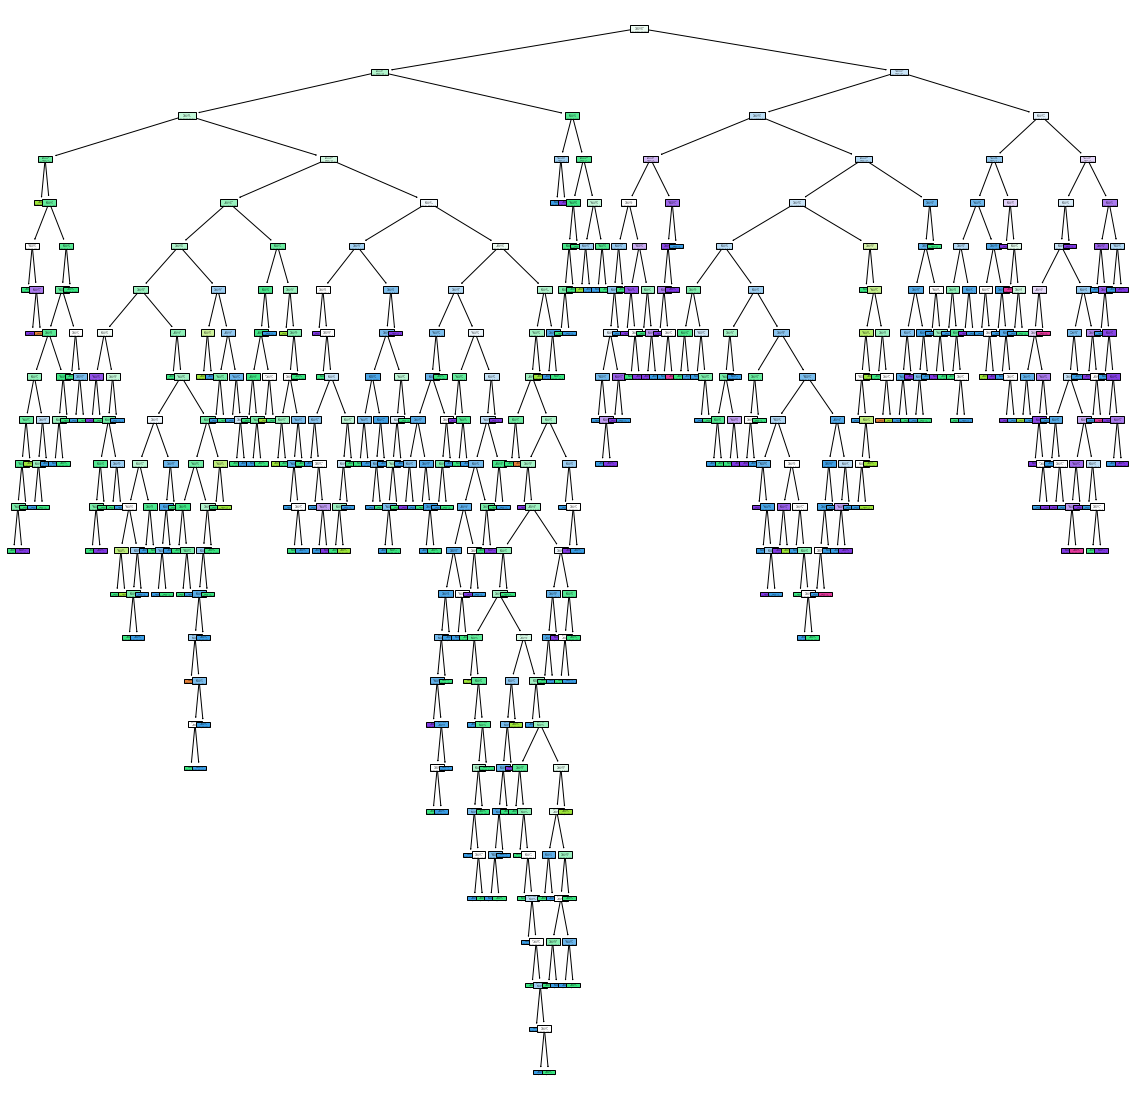

In [68]:
#plotting 1 st tree of random forest bag 
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(350.4583379679205, 1062.490909090909, 'X[1] <= 0.335\ngini = 0.651\nsamples = 761\nvalue = [6, 45, 533, 434, 166, 15]'),
 Text(33.932432432432435, 1013.0727272727273, 'X[3] <= 1.65\ngini = 0.634\nsamples = 104\nvalue = [0, 1, 19, 57, 71, 6]'),
 Text(8.617760617760618, 963.6545454545455, 'X[2] <= 0.36\ngini = 0.188\nsamples = 12\nvalue = [0, 0, 0, 17, 2, 0]'),
 Text(4.308880308880309, 914.2363636363636, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(12.926640926640928, 914.2363636363636, 'X[2] <= 0.465\ngini = 0.105\nsamples = 11\nvalue = [0, 0, 0, 17, 1, 0]'),
 Text(8.617760617760618, 864.8181818181819, 'gini = 0.0\nsamples = 8\nvalue = [0, 0, 0, 14, 0, 0]'),
 Text(17.235521235521237, 864.8181818181819, 'X[4] <= 0.059\ngini = 0.375\nsamples = 3\nvalue = [0, 0, 0, 3, 1, 0]'),
 Text(12.926640926640928, 815.4000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 1, 0]'),
 Text(21.544401544401545, 815.4000000000001, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 3, 

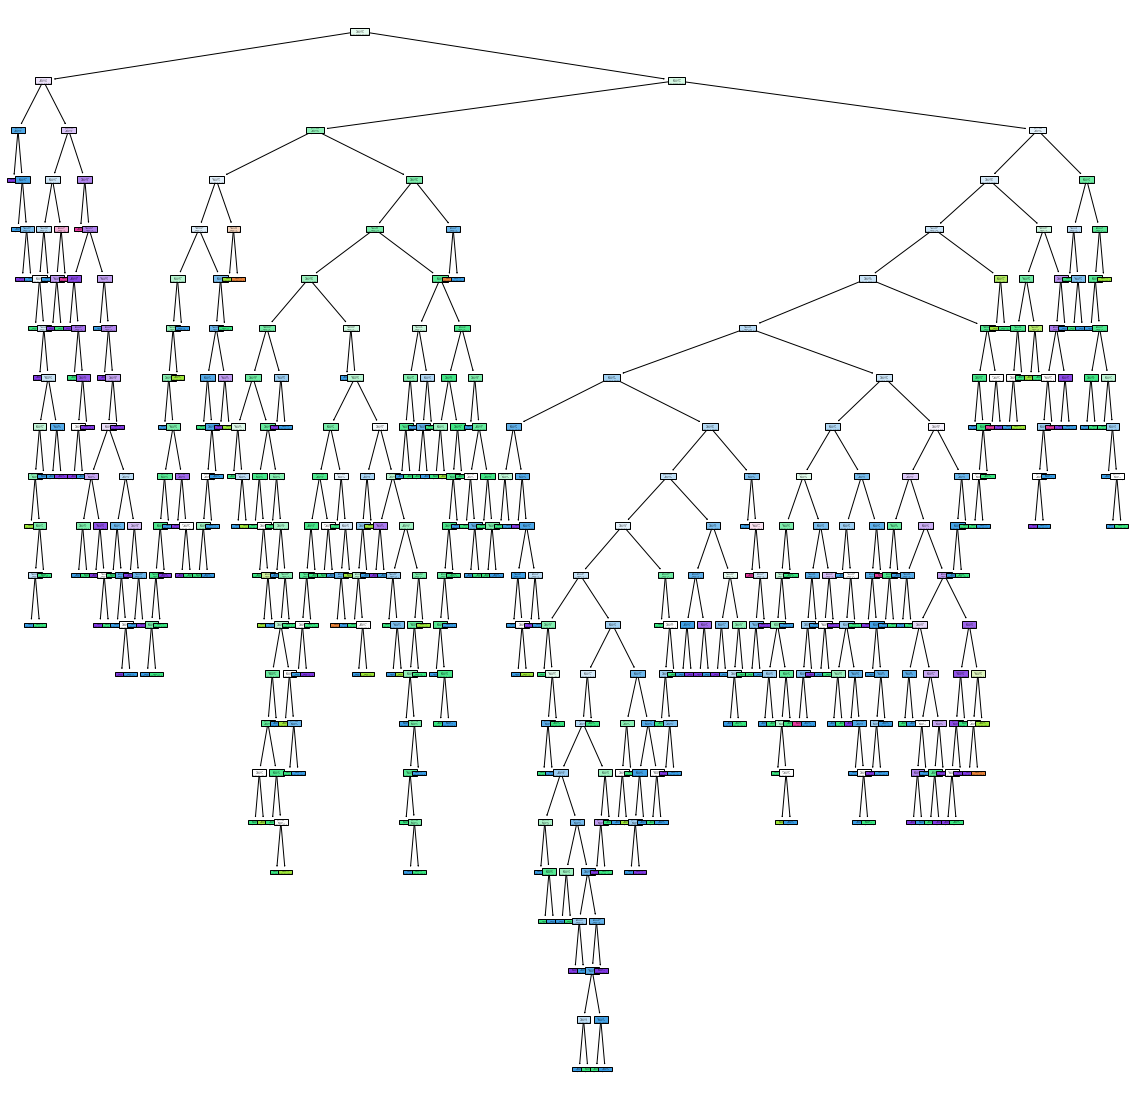

In [69]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1],filled=True)

In [ ]:
# both trees using different sub samples of data hence getting different structure of Tress 
# random search is hard to interpret menas hard to understand how data distributed in diff trees 

# plotting all trees in loop

for i in range(len(rf.estimators)):
    plt.figure(figsize=(20,20))
    tree.plot_tree(rf.estimators_[i],filled=True)

In [76]:
grid_params = {
    "n_estimators" : [5,10,15,100,120,150],
    "criterion": ['gini','entropy'],
    "max_depth": range(10),
    "min_samples_leaf":range(10)
}

In [77]:
rf = RandomForestClassifier(n_estimators=10)

In [78]:
grid_rf = GridSearchCV(estimator=rf,param_grid=grid_params,cv=10,n_jobs=6,verbose=1)

In [79]:
grid_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.6s
[Parallel(n_jobs=6)]: Done 1132 tasks      | elapsed:   11.6s
[Parallel(n_jobs=6)]: Done 2580 tasks      | elapsed:   35.4s
[Parallel(n_jobs=6)]: Done 3980 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 5780 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 8472 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 10868 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 11989 out of 12000 | elapsed:  4.2min remaining:    0.1s
[Parallel(n_jobs=6)]: Done 12000 out of 12000 | elapsed:  4.2min finished


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10), n_jobs=6,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 15, 100, 120, 150]},
             verbose=1)

In [80]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [81]:
rf_best = RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,n_estimators=100)

In [83]:
rf_best.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9)

In [84]:
rf_best.score(x_test,y_test)

0.67

[Text(654.7147556390978, 1032.8400000000001, 'X[9] <= 0.685\nentropy = 1.751\nsamples = 753\nvalue = [7, 61, 517, 457, 145, 12]'),
 Text(410.98308270676694, 924.1200000000001, 'X[6] <= 63.5\nentropy = 1.541\nsamples = 501\nvalue = [6, 50, 405, 289, 38, 0]'),
 Text(263.26691729323306, 815.4000000000001, 'X[1] <= 0.752\nentropy = 1.655\nsamples = 370\nvalue = [6, 48, 247, 239, 33, 0]'),
 Text(158.03007518796994, 706.6800000000001, 'X[10] <= 10.75\nentropy = 1.497\nsamples = 324\nvalue = [0, 22, 221, 223, 33, 0]'),
 Text(69.22556390977444, 597.96, 'X[9] <= 0.555\nentropy = 1.36\nsamples = 213\nvalue = [0, 16, 187, 119, 10, 0]'),
 Text(39.15789473684211, 489.24, 'X[3] <= 1.65\nentropy = 1.118\nsamples = 83\nvalue = [0, 10, 93, 29, 0, 0]'),
 Text(33.56390977443609, 380.5200000000001, 'entropy = 0.0\nsamples = 13\nvalue = [0, 0, 24, 0, 0, 0]'),
 Text(44.75187969924812, 380.5200000000001, 'X[10] <= 10.15\nentropy = 1.24\nsamples = 70\nvalue = [0, 10, 69, 29, 0, 0]'),
 Text(22.37593984962406, 

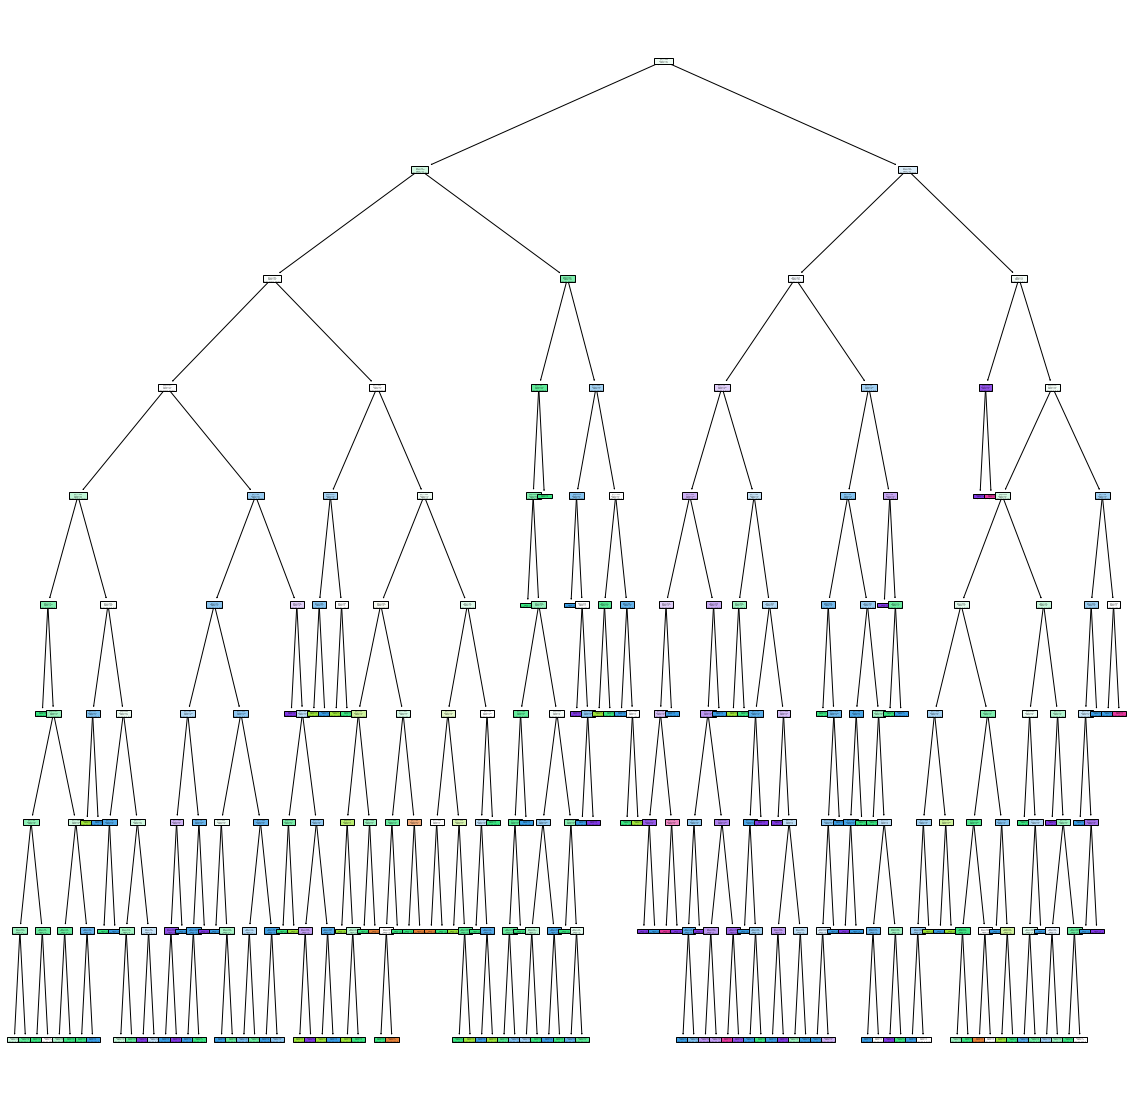

In [85]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_best.estimators_[0],filled=True)